### Student Information
Name:楊智堯 Kevin

Student ID:111065542

GitHub ID: KevinCodePlace

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

In [239]:
### Begin Assignment Here

## First Part

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [240]:
# Preparation
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

import pandas as pd

# my functions
def format_rows(docs):
  """ format the text field and strip special characters """
  D = []
  for d in docs.data:
      temp_d = " ".join(d.split("\n")).strip('\n\t')
      D.append([temp_d])
  return D

# construct dataframe from a list
X = pd.DataFrame.from_records(format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: twenty_train.target_names[t])

In [241]:
# Exercise 2 answer here
# Origin
X[:10]
## 1.simple query
print("1.simple query:X[:10][['text','category_name']]")
print(X[:10][['text','category_name']])
print('--------------------------------------------')
## 2.query by loc(label)
print("2.query by loc(label):X.loc[:10, ['text','category']]")
print(X.loc[:10, ['text','category']])
print('--------------------------------------------')
## 3.query by iloc(location)
print("3.query by iloc(location):X.iloc[:10,[0,2]]")
print(X.iloc[:10,[0,2]])
print('--------------------------------------------')

## 4.query by query(condition)
print("4.query by query(condition):X.query('category>1') & X.query('(category>2) & (index<500)')")
print(X.query('category>1'))
print(X.query('(category>2) & (index<500)'))
print('--------------------------------------------')

## 5. in and not in statement(null in this case)
print("5. in and not in statement(null in this case):X.query('text in category')")
print(X.query('text in category'))
print('--------------------------------------------')
 

1.simple query:X[:10][['text','category_name']]
                                                text           category_name
0  From: sd345@city.ac.uk (Michael Collier) Subje...           comp.graphics
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...           comp.graphics
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...  soc.religion.christian
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...  soc.religion.christian
4  From: stanly@grok11.columbiasc.ncr.com (stanly...  soc.religion.christian
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...  soc.religion.christian
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...  soc.religion.christian
7  From: aldridge@netcom.com (Jacquelin Aldridge)...                 sci.med
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...                 sci.med
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...                 sci.med
--------------------------------------------
2.query by loc(label):X.loc[:10, ['text','category']]
      

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [242]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [243]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [244]:
# Exercise 5 Answer here
print('index:0 missing_example:',NA_df['missing_example'][0],'/type of the value:',type(NA_df['missing_example'][0]),'which is null')
print('index:1 missing_example:',NA_df['missing_example'][1],'/type of the value:',type(NA_df['missing_example'][1]),'which is null')
print('index:4 missing_example:',NA_df['missing_example'][4],'/type of the value:',type(NA_df['missing_example'][4]),'which is null')
print('\nReason: Unlike other popular programming languages, such as Java and C++, Python does not use the NULL keyword. Instead, Python uses NaN and None')
print("That's why above three examples are null. We can go deeper to see the difference between NaN and None(Nonetype)")
print("NaN can be used as a numerical value on mathematical operations, while None cannot (or at least shouldn't).")
print('---------------------------------------------------')
print('index:2 missing_example:',NA_df['missing_example'][2],'/type of the value:',type(NA_df['missing_example'][2]),'which is not null')
print('index:3 missing_example:',NA_df['missing_example'][3],'/type of the value:',type(NA_df['missing_example'][3]),'which is not null')
print('index:5 missing_example:',NA_df['missing_example'][5],'/type of the value:',type(NA_df['missing_example'][5]),'which is not null')
print("\nReason:As you can see, above three examples' type are all string, and that's why these three examples are not null,\neven if the value is 'NaN'(not NaN) , 'None'(not NoneType), or ''.")
# for i,element in enumerate(NA_df['missing_example']):
#   print(i,element,type(element))

index:0 missing_example: nan /type of the value: <class 'float'> which is null
index:1 missing_example: nan /type of the value: <class 'float'> which is null
index:4 missing_example: None /type of the value: <class 'NoneType'> which is null

Reason: Unlike other popular programming languages, such as Java and C++, Python does not use the NULL keyword. Instead, Python uses NaN and None
That's why above three examples are null. We can go deeper to see the difference between NaN and None(Nonetype)
NaN can be used as a numerical value on mathematical operations, while None cannot (or at least shouldn't).
---------------------------------------------------
index:2 missing_example: NaN /type of the value: <class 'str'> which is not null
index:3 missing_example: None /type of the value: <class 'str'> which is not null
index:5 missing_example:  /type of the value: <class 'str'> which is not null

Reason:As you can see, above three examples' type are all string, and that's why these three examp

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [245]:
# Exercise 6 Answer here
print("before here we have done")
print("---------------------------------------------------")
print("1. checking missing value")
print("We can observe that there is no missing value. Even we later concat a dummy series like below.")
print("result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)")
print("We didn't change the value of X, so X remain the same")
X.isnull().apply(lambda x: check_missing_values(x))

before here we have done
---------------------------------------------------
1. checking missing value
We can observe that there is no missing value. Even we later concat a dummy series like below.
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)
We didn't change the value of X, so X remain the same


,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [246]:
X[:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


In [247]:
print("Later we check the duplicate data")
print("As you can see, the number of duplicate data is 0")
print("sum(X.duplicated('text'): ",sum(X.duplicated('text')))

print("\nBut this time, we directly concat the dummy_duplicate_dict in X, so X changes(insert two rows)")
print("original length:",len(X))
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        }]
X = pd.concat([X, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)
print("after concat length:",len(X))
print("and then, we use X.drop_duplicates(keep=False, inplace=True) to drop the duplicate, so X remain the same.")
X.drop_duplicates(keep=False, inplace=True)
print("after dropping length:",len(X))

X[:10]

Later we check the duplicate data
As you can see, the number of duplicate data is 0
sum(X.duplicated('text'):  0

But this time, we directly concat the dummy_duplicate_dict in X, so X changes(insert two rows)
original length: 2257
after concat length: 2259
and then, we use X.drop_duplicates(keep=False, inplace=True) to drop the duplicate, so X remain the same.
after dropping length: 2257


,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


In [248]:
print('In short, X is still the same as beginning')

In short, X is still the same as beginning


In [249]:
print("but if it is about the Sampling, We can use ranfom_state to assure every time we get the same sample results")
print("you can see X_sample_1 and X_sample_2 below, every time the result of the sample is different.")
print("But with the same number in random_state(e.g 42), you can see X_sample_3 is equal to X_sample_4")
X_sample_1 = X.sample(n=1000)
X_sample_1[:5]

but if it is about the Sampling, We can use ranfom_state to assure every time we get the same sample results
you can see X_sample_1 and X_sample_2 below, every time the result of the sample is different.
But with the same number in random_state(e.g 42), you can see X_sample_3 is equal to X_sample_4


,text,category,category_name
2167,From: acooper@mac.cc.macalstr.edu Subject: Re:...,0,alt.atheism
997,From: kxgst1+@pitt.edu (Kenneth Gilbert) Subje...,2,sci.med
831,From: mcovingt@aisun3.ai.uga.edu (Michael Covi...,3,soc.religion.christian
960,From: db7n+@andrew.cmu.edu (D. Andrew Byler) S...,3,soc.religion.christian
1386,From: ednclark@kraken.itc.gu.edu.au (Jeffrey C...,0,alt.atheism


In [250]:
X_sample_2 = X.sample(n=1000)
X_sample_2[:5]

,text,category,category_name
56,From: kaminski@netcom.com (Peter Kaminski) Sub...,2,sci.med
1923,From: rm03@ic.ac.uk (Mr R. Mellish) Subject: R...,0,alt.atheism
557,From: twong@civil.ubc.ca (Thomas Wong) Subject...,2,sci.med
1612,From: bhjelle@carina.unm.edu () Subject: Re: B...,2,sci.med
2219,From: pk115050@wvnvms.wvnet.edu Subject: HELP ...,2,sci.med


In [251]:
X_sample_3 = X.sample(n=1000, random_state=42)
X_sample_3[:5]


,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism


In [252]:
X_sample_4 = X.sample(n=1000, random_state=42)
X_sample_4[:5]

,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism


### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

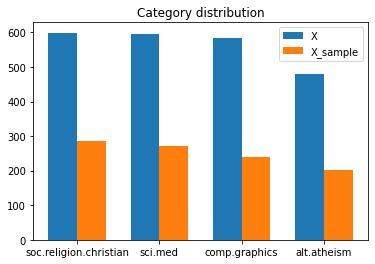

In [253]:
# Exercise 8 Answer here
import matplotlib.pyplot as plt

X_sample = X.sample(n=1000)
x_axis_categories = X.category_name.value_counts().index.tolist()

index = np.arange(4)
bar_width = 0.35
fig, ax = plt.subplots()
X_bar = ax.bar(index, X.category_name.value_counts(), bar_width, label="X")

X_sample_bar = ax.bar(index+bar_width, X_sample.category_name.value_counts(),bar_width, label="X_sample")
ax.set_title('Category distribution')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(x_axis_categories)
ax.legend() 
plt.show()




### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [254]:
# Exercise 10 Answer here
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
analyze = count_vect.build_analyzer()
for index,value in enumerate(X_counts[4, 0:100].toarray()[0]):
  if value == 1:
    if index == 0:
      continue
    print('Index:',index,' The word is:',count_vect.get_feature_names_out()[index])



Index: 37  The word is: 01


### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

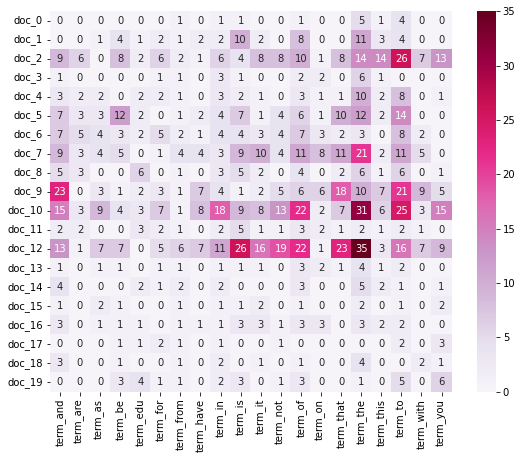

In [255]:
# Exercise 11 Answer here
import seaborn as sns

count_vect_top = CountVectorizer(max_features=20)
X_counts_top = count_vect_top.fit_transform(X.text)

# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect_top.get_feature_names_out()[0:20]]

# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

plot_z = X_counts_top[0:20, 0:20].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=35, annot=True)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [256]:
from sklearn.decomposition import PCA

In [257]:
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

<Figure size 1800x720 with 0 Axes>

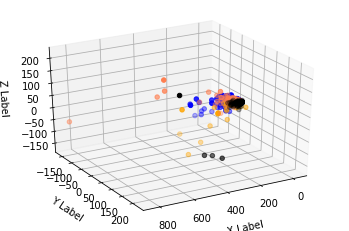

In [258]:
# Exercise 12 Answer here

col = ['coral', 'blue', 'black', 'orange']

# plot
def draw_3D(elev,azim):
  fig = plt.figure(figsize = (25,10))
  ax = plt.figure().add_subplot(projection='3d')

  for c, category in zip(col, categories):
      xs = X_reduced[X['category_name'] == category].T[0]
      ys = X_reduced[X['category_name'] == category].T[1]
      zs = X_reduced[X['category_name'] == category].T[2]
    
      ax.scatter(xs, ys, zs, c = c, marker='o')

  ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
  ax.set_xlabel('\nX Label')
  ax.set_ylabel('\nY Label')
  ax.set_zlabel('\nZ Label')
  ax.view_init(elev,azim)

draw_3D(30,60)
plt.show()

<Figure size 1800x720 with 0 Axes>

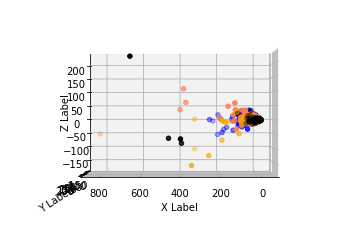

In [259]:
draw_3D(0,90)
plt.show()

<Figure size 1800x720 with 0 Axes>

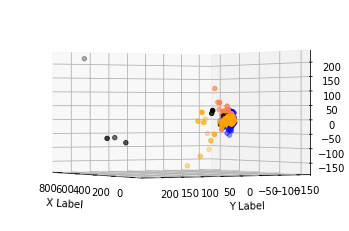

In [260]:
draw_3D(0,150)
plt.show()

Oberservation:

---
points' X-axis in between 0 to 200 are the most.(See pic 2)   
points' Y-axis in between 50 to (-50) are the most(See pic 3)    
points' Z-axis in between 50 to (-50) are the most(See pic 2 or 3)

As you can see,  
Blue points are more concentrated than coral and black,
and there are four black points far away from the other points. 

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [261]:
#Exercise 13 answer here
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [262]:
import plotly.express as px

feature_name_df = pd.DataFrame(count_vect.get_feature_names_out()[:300],columns = ['term'])
term_frequencies_df = pd.DataFrame(term_frequencies[:300],columns = ['frequencies'])
feature_frequencies_df = pd.concat([feature_name_df, term_frequencies_df], join = 'outer', axis = 1)
fig = px.bar(feature_frequencies_df, x='term', y='frequencies')
print('We can observe the data in historgram, see below(e.g for 300 data):')
fig.show(renderer="colab")

We can observe the data in historgram, see below(e.g for 300 data):


### >>> **Exercise 14 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.



In [263]:
#Exercise 14 answer here
fig = px.bar(feature_frequencies_df.query("`frequencies` >= 10"), x='term', y='frequencies')
print('We can observe the data after filtering data(only leave those frequencies >= 10) in historgram, see below(e.g only 17/300 data here):')
fig.show(renderer="colab")

We can observe the data after filtering data(only leave those frequencies >= 10) in historgram, see below(e.g only 17/300 data here):


### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [264]:
#Exercise 15 answer here
sort = feature_frequencies_df.sort_values(by=['frequencies'],ascending=False)
fig = px.bar(sort, x='term', y='frequencies')
fig.show(renderer="colab")

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [265]:
#Exercise 16 answer here
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category'] = mlb.transform(X['category_name']).tolist()
print('Yes, using the category_name column also works. See the result below:\n')
X[0:9]

Yes, using the category_name column also works. See the result below:



,text,category,category_name,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"


## Second Part


### 1.Data Source

In [266]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. Data Preparation

In [267]:
# orginal file: 'Wow... Loved this place.	1', 'Crust is not good.	0'
# output: text => ['Wow... Loved this place. ', 'Crust is not good. '], number=> [1, 0]
f = open('/content/drive/MyDrive/graduate/dm/lab1/DM2022-Lab1-Homework-main/yelp_labelled.txt', 'r',encoding="utf-8")
fileRead = f.readlines()
text = []
number = []
for line in fileRead:
  split_line = line.split()
  word = ''
  for i in range(len(split_line)-1):
     word = word + split_line[i] + ' '
  number.append(int(split_line[len(split_line)-1]))
  text.append(word) 

f.close()

In [268]:
f = open('/content/drive/MyDrive/graduate/dm/lab1/DM2022-Lab1-Homework-main/imdb_labelled.txt', 'r',encoding="utf-8")
fileRead = f.readlines()
for line in fileRead:
  split_line = line.split()
  word = ''
  for i in range(len(split_line)-1):
     word = word + split_line[i] + ' '
  number.append(int(split_line[len(split_line)-1]))
  text.append(word) 

f.close()


In [269]:
f = open('/content/drive/MyDrive/graduate/dm/lab1/DM2022-Lab1-Homework-main/amazon_cells_labelled.txt', 'r',encoding="utf-8")
fileRead = f.readlines()
for line in fileRead:
  split_line = line.split()
  word = ''
  for i in range(len(split_line)-1):
     word = word + split_line[i] + ' '
  number.append(int(split_line[len(split_line)-1]))
  text.append(word) 

f.close()

In [270]:
for i in range(3):
  print('This is original file:  ',fileRead[i])
  print('This is text list:  ',text[i])
  print('This is number list:  ',number[i])
  print('---------------------------------------')

This is original file:   So there is no way for me to plug it in here in the US unless I go by a converter.	0

This is text list:   Wow... Loved this place. 
This is number list:   1
---------------------------------------
This is original file:   Good case, Excellent value.	1

This is text list:   Crust is not good. 
This is number list:   0
---------------------------------------
This is original file:   Great for the jawbone.	1

This is text list:   Not tasty and the texture was just nasty. 
This is number list:   0
---------------------------------------


### 3. Data Transformation

#### 3.1 Converting Dictionary into Pandas Dataframe

In [271]:
# construct dataframe from a list
Y = pd.DataFrame(text, columns= ['sentence'])

# add category to the dataframe
Y['score'] = number

Y

,sentence,score
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
2995,The screen does get smudged easily because it ...,0
2996,What a piece of junk.. I lose more calls on th...,0
2997,Item Does Not Match Picture.,0
2998,The only thing that disappoint me is the infra...,0


### 4. Data Mining using Pandas

#### 4.1 Missing Values

In [272]:
# check missing values
Y.isnull()

,sentence,score
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
2995,False,False
2996,False,False
2997,False,False
2998,False,False


In [273]:
def check_missing_values(row):
    """ functions that check and verifies if there are missing values in dataframe """
    counter = 0
    for element in row:
        if element == True:
            counter+=1
    return ("The amoung of missing records is: ", counter)

Y.isnull().apply(lambda y: check_missing_values(y))

# If there are null value, we can use the code below
# Y.dropna(inplace=True)

,sentence,score
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


#### 4.2 Dealing with Duplicate Data


In [274]:
# check Duplicate values
Y.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [275]:
sum(Y.duplicated('sentence'))
# we are going to drop the Duplicate values

18

In [276]:
len(Y)

3000

In [277]:
Y.drop_duplicates(keep=False, inplace=True)

In [278]:
len(Y)

2964

### 5.  Data Preprocessing


#### 5.1 Sampling


In [279]:
Y_sample = Y.sample(n=1000)

In [280]:
len(Y_sample)

1000

In [281]:
Y_sample[0:4]

,sentence,score
2387,The best phone in market :).,1
763,But the service was beyond bad.,0
1218,It's this pandering to the audience that sabot...,0
2769,Crisp and Clear.,1


Y: 
0    1484
1    1480
Name: score, dtype: int64

Y_sample 
1    514
0    486
Name: score, dtype: int64


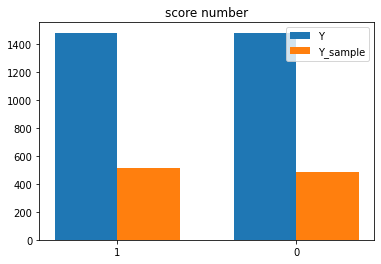

In [282]:
# Draw the comparation between Y & Y_sample
print('Y: ')
print(Y.score.value_counts())
print('\nY_sample ')
print(Y_sample.score.value_counts())
index = np.arange(2)
bar_width = 0.35
fig, ax = plt.subplots()
Y_bar = ax.bar(index, Y.score.value_counts(), bar_width, label="Y")

Y_sample_bar = ax.bar(index+bar_width, Y_sample.score.value_counts(),bar_width, label="Y_sample")
ax.set_title('score number')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels([1,0])
ax.legend() 
plt.show()

#### 5.2 Feature Creation


In [283]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [284]:
def tokenize_text(text, remove_stopwords=False):
    """
    Tokenize text using the nltk library
    """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            # filters here
            tokens.append(word)
    return tokens

Y['unigrams'] = Y['sentence'].apply(lambda y: tokenize_text(y))

In [285]:
Y[0:4]["unigrams"]

0                    [Wow, ..., Loved, this, place, .]
1                            [Crust, is, not, good, .]
2    [Not, tasty, and, the, texture, was, just, nas...
3    [Stopped, by, during, the, late, May, bank, ho...
Name: unigrams, dtype: object

In [286]:
Y[0:4]

,sentence,score,unigrams
0,Wow... Loved this place.,1,"[Wow, ..., Loved, this, place, .]"
1,Crust is not good.,0,"[Crust, is, not, good, .]"
2,Not tasty and the texture was just nasty.,0,"[Not, tasty, and, the, texture, was, just, nas..."
3,Stopped by during the late May bank holiday of...,1,"[Stopped, by, during, the, late, May, bank, ho..."


#### 5.3 Feature subset selection

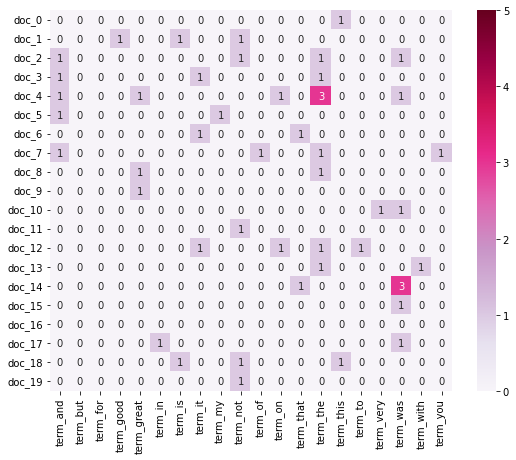

In [287]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

count_vect_top = CountVectorizer(max_features=20)
Y_counts_top = count_vect_top.fit_transform(Y.sentence)

# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect_top.get_feature_names_out()[0:20]]

# obtain document index
plot_y = ["doc_"+ str(i) for i in list(Y.index)[0:20]]

plot_z = Y_counts_top[0:20, 0:20].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=5, annot=True)

#### 5.4 Dimensionality Reduction

In [288]:
from sklearn.decomposition import PCA

In [289]:
Y_reduced = PCA(n_components = 2).fit_transform(Y_counts_top.toarray())

In [290]:
Y_reduced.shape

(2964, 2)

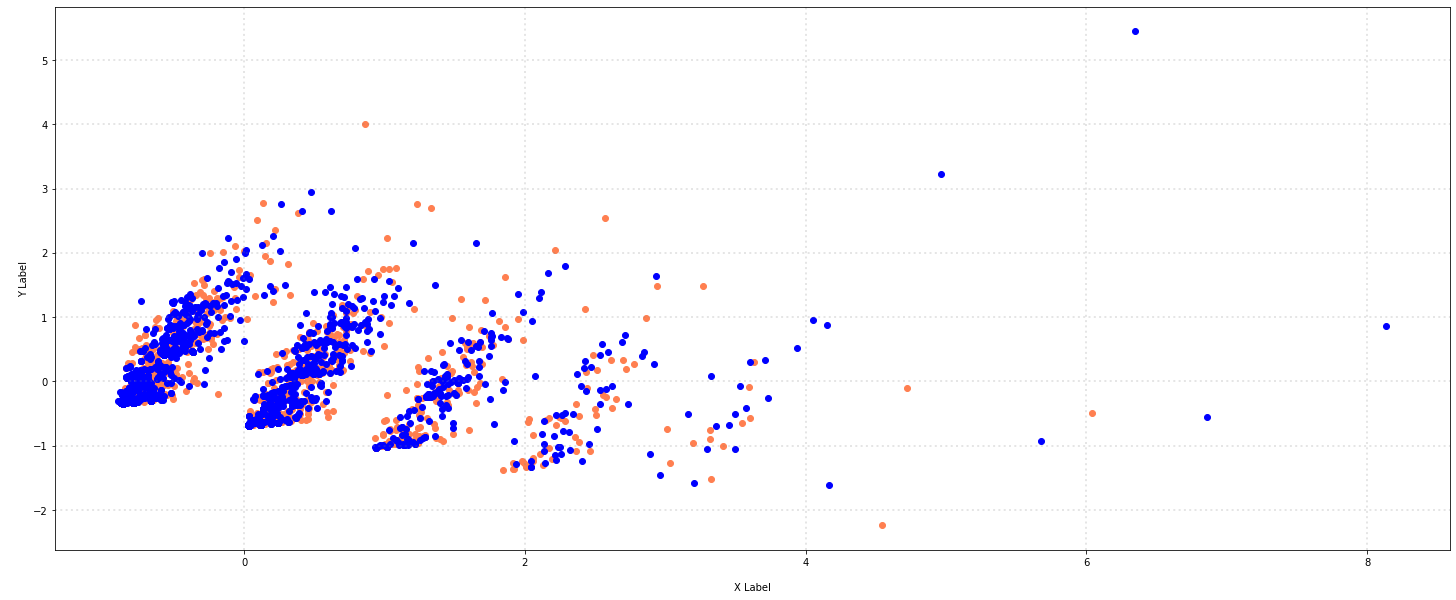

In [291]:
col = ['coral', 'blue', 'black', 'orange']
# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()
categories = [0,1]
for c, category in zip(col, categories):
    xs = Y_reduced[Y['score'] == category].T[0]
    ys = Y_reduced[Y['score'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

<Figure size 1800x720 with 0 Axes>

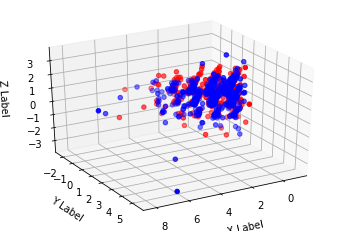

In [292]:
Y_reduced_3D = PCA(n_components = 3).fit_transform(Y_counts_top.toarray())

col = ['red', 'blue', 'orange']

# plot
def drawy_3D(elev,azim):
  fig = plt.figure(figsize = (25,10))
  ax = plt.figure().add_subplot(projection='3d')

  for c, category in zip(col, categories):
      xs = Y_reduced_3D[Y['score'] == category].T[0]
      ys = Y_reduced_3D[Y['score'] == category].T[1]
      zs = Y_reduced_3D[Y['score'] == category].T[2]
    
      ax.scatter(xs, ys, zs, c = c, marker='o')

  ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
  ax.set_xlabel('\nX Label')
  ax.set_ylabel('\nY Label')
  ax.set_zlabel('\nZ Label')
  ax.view_init(elev,azim)

drawy_3D(30,60)
plt.show()

#### 5.5 Attribute Transformation / Aggregation


In [293]:
y_term_frequencies = []
for j in range(0,Y_counts_top.shape[1]):
    y_term_frequencies.append(sum(Y_counts_top[:,j].toarray()))

y_term_frequencies = np.asarray(Y_counts_top.sum(axis=0))[0]

In [294]:
import plotly.express as px

yfeature_name_df = pd.DataFrame(count_vect_top.get_feature_names_out()[:300],columns = ['term'])
yterm_frequencies_df = pd.DataFrame(y_term_frequencies[:300],columns = ['frequencies'])
yfeature_frequencies_df = pd.concat([yfeature_name_df, yterm_frequencies_df], join = 'outer', axis = 1)
fig = px.bar(yfeature_frequencies_df, x='term', y='frequencies')
print('We can observe the data in historgram, see below(e.g for 300 data):')
fig.show(renderer="colab")

We can observe the data in historgram, see below(e.g for 300 data):


In [295]:
## we can sort this histogram
ysort = yfeature_frequencies_df.sort_values(by=['frequencies'],ascending=False)
fig = px.bar(ysort, x='term', y='frequencies')
fig.show(renderer="colab")

#### 5.6 Discretization and Binarization

In [296]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [297]:
mlb = preprocessing.LabelBinarizer()

In [298]:
mlb.fit(Y.score)

LabelBinarizer()

In [299]:
Y['bin_category'] = mlb.transform(Y['score']).tolist()

In [300]:
Y[0:9]

,sentence,score,unigrams,bin_category
0,Wow... Loved this place.,1,"[Wow, ..., Loved, this, place, .]",[1]
1,Crust is not good.,0,"[Crust, is, not, good, .]",[0]
2,Not tasty and the texture was just nasty.,0,"[Not, tasty, and, the, texture, was, just, nas...",[0]
3,Stopped by during the late May bank holiday of...,1,"[Stopped, by, during, the, late, May, bank, ho...",[1]
4,The selection on the menu was great and so wer...,1,"[The, selection, on, the, menu, was, great, an...",[1]
5,Now I am getting angry and I want my damn pho.,0,"[Now, I, am, getting, angry, and, I, want, my,...",[0]
6,Honeslty it didn't taste THAT fresh.),0,"[Honeslty, it, did, n't, taste, THAT, fresh, ....",[0]
7,The potatoes were like rubber and you could te...,0,"[The, potatoes, were, like, rubber, and, you, ...",[0]
8,The fries were great too.,1,"[The, fries, were, great, too, .]",[1]


### 6. Data Exploration

In [301]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = Y.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = Y.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = Y.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [302]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['We ordered the duck rare and it was pink and tender on the inside with a nice char on the outside. ']
['Our server was fantastic and when he found out the wife loves roasted garlic and bone marrow, he added extra to our meal and another marrow to go! ']
['My fiancé and I came in the middle of the day and we were greeted and seated right away. ']


In [303]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [304]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.281718
Cosine Similarity using count bw 1 and 3: 0.484481
Cosine Similarity using count bw 2 and 3: 0.346467
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


## Third Part


### 3-1:Generate meaningful new data visualizations. Refer to online resources and the Data Mining textbook for inspiration and ideas.

In [305]:
fig = px.pie(yfeature_frequencies_df[:300], values='frequencies', names='term', title="Each Term and It's frequency")
print('We can observe the data in pie chart, see below:')
print('Compared with the historgram we can only know the order, in pie chart we can also know the percentage(weight) of each word')
print("Now we can not only know each words' record but also the the words' relationship in the whole picture.")
fig.show(renderer="colab")

We can observe the data in pie chart, see below:
Compared with the historgram we can only know the order, in pie chart we can also know the percentage(weight) of each word
Now we can not only know each words' record but also the the words' relationship in the whole picture.


In [306]:
print("We can observe the data in box chart, see below:")
print("In this chart, we can further know that the  min, first quartile(Q1), median, Third quartile(Q3), and the max value,")
print("Next time if we get a new frequency, then we can easily know the 'location' of the word")
fig = px.box(yfeature_frequencies_df[:300], y="frequencies")
fig.show()

We can observe the data in box chart, see below:
In this chart, we can further know that the  min, first quartile(Q1), median, Third quartile(Q3), and the max value,
Next time if we get a new frequency, then we can easily know the 'location' of the word


In [307]:
print("We can observe the data in viloin chart, see below:")
print("In this chart, we can know more data than box chart, since box chart focus on five values(min to max), but violin chart also show the distribution in every weight of the words")
fig = px.violin(yfeature_frequencies_df[:300], y='frequencies')
fig.show(renderer="colab")

We can observe the data in viloin chart, see below:
In this chart, we can know more data than box chart, since box chart focus on five values(min to max), but violin chart also show the distribution in every weight of the words


### 3-2: Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) 

In [308]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser  = TfidfVectorizer(norm = None)
Y_tfidf_scores = vectoriser.fit_transform(Y.sentence)

# get vocabulary of terms
feature_names = vectoriser.get_feature_names()
corpus_index = [n for n in Y.sentence]

# create pandas DataFrame with tf-idf scores: Term-Document Matrix
df_tf_idf = pd.DataFrame(Y_tfidf_scores.todense(), index = corpus_index, columns = feature_names)
df_tf_idf


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,00,10,100,11,12,13,15,15g,15pm,17,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
Wow... Loved this place.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Crust is not good.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Not tasty and the texture was just nasty.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The selection on the menu was great and so were the prices.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The screen does get smudged easily because it touches your ear and face.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
What a piece of junk.. I lose more calls on this phone.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Item Does Not Match Picture.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The only thing that disappoint me is the infra red port (irda).,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3-3: Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).

In [309]:
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

train_X , test_X , train_y , test_y = train_test_split(Y.sentence, Y.score, test_size=0.7, random_state=0)

# Applying tf vectorizer (count vectorizer)
count_vectorizer = CountVectorizer()
X_train_tf = count_vectorizer.fit_transform(train_X)
print("Use CountVectorizer")
# Transforming test data into tf-vectorized matrix
X_test_tf = count_vectorizer.transform(test_X)

# Applying Naive Bayes
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tf, train_y)

# Calculating accuracy and generating classification report from test data
t = time()
y_pred = naive_bayes_classifier.predict(X_test_tf)

test_time = time() - t
print("test time: %0.3fs" % test_time)

# compute the performance measures
score1 = metrics.accuracy_score(test_y, y_pred)
print("accuracy: %0.3f" % score1)

print(metrics.classification_report(test_y, y_pred,target_names=['Positive', 'Negative']))
                                            
# print("confusion matrix:")
# print(metrics.confusion_matrix(test_y, y_pred))
print('------------------------------')


Use CountVectorizer
test time: 0.001s
accuracy: 0.779
              precision    recall  f1-score   support

    Positive       0.78      0.78      0.78      1044
    Negative       0.78      0.78      0.78      1031

    accuracy                           0.78      2075
   macro avg       0.78      0.78      0.78      2075
weighted avg       0.78      0.78      0.78      2075

------------------------------


In [310]:
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

train_X , test_X , train_y , test_y = train_test_split(Y.sentence, Y.score, test_size=0.7, random_state=0)

# Applying tf vectorizer (count vectorizer)
tf_vectorizer = TfidfVectorizer()
X_train_tf = tf_vectorizer.fit_transform(train_X)
print("Use TfidfVectorizer")

# Transforming test data into tf-vectorized matrix
X_test_tf = tf_vectorizer.transform(test_X)
# Applying Naive Bayes
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tf, train_y)

# Calculating accuracy and generating classification report from test data
t = time()
y_pred = naive_bayes_classifier.predict(X_test_tf)

test_time = time() - t
print("test time: %0.3fs" % test_time)

# compute the performance measures
score1 = metrics.accuracy_score(test_y, y_pred)
print("accuracy: %0.3f" % score1)

print(metrics.classification_report(test_y, y_pred,target_names=['Positive', 'Negative']))
                                            
# print("confusion matrix:")
# print(metrics.confusion_matrix(test_y, y_pred))
print('------------------------------')




Use TfidfVectorizer
test time: 0.001s
accuracy: 0.784
              precision    recall  f1-score   support

    Positive       0.79      0.77      0.78      1044
    Negative       0.77      0.80      0.79      1031

    accuracy                           0.78      2075
   macro avg       0.78      0.78      0.78      2075
weighted avg       0.78      0.78      0.78      2075

------------------------------


The difference  
---
TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. We can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions

## Fourth Part
What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets?


### in 4.2 Dealing with Duplicate Data, reserve the origin duplicate data
---------------
At the beginning,we use **Y.drop_duplicates(keep=False, inplace=True)** to drop the duplicates. The method above even drop the original value.  
Instead, we can use **Y.drop_duplicates(keep=True, inplace=True)**. It can help us reserve the original data and only drop the duplicated one.

### In 5.1 Sampling, use Oversampling rather than only (under-)sampling
---------------------------------------------------
If We have much more negative than postive(let's say 30:1), in 5.1 We just reduce the negative one by sampling, but it lose the benefits(or patterns) of large amount of data.

A better way is to use **over-sampling**, especially Synthetic Minority Oversampling Technique (SMOTE).

SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample as a point along that line.




### In 5.2 Feature Creation, we can add other attributes. 
--------------------------------------------------------------- 
If it is for nlp usage, it is much better to create 'bag of words','word_frequency', or 'N-gram' for further usage rather than unigrams.

Such as TF-IDF or other techniques



### In 5.3 Feature Subset Selection, calculate the similarity first to decide select which features
------------------
The goal of this method is to reduce the irrelevant or redundant data.  
The better way to do the method is calculating feature relevance first, and thus we can know if there is redundancy in the features.  
There are lots of methods to use, such as

1. Correlation Based Similarity Measure
2. Cosine Similarity
3. Jaccard index/coefficient 




### In 5.3 Feature Subset Selection, only find the top features
--------------------------------------------------------
 Use count_vect_top = CountVectorizer(max_features=2000),rather than count_vect_top = CountVectorizer()

 Or as we can see, the result will be sparse matrix and the vectorizer need more time to compute not meaningful data.
